# Data Augmentation para balancear clases con SMOTE

Vamos a utilizar el generador de datasets de sklearn

In [1]:
import numpy as np

import keras
from keras import layers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Create an unbalanced dataset
X, y = make_classification(
    n_samples=1000,  # Total samples
    n_features=20,   # Number of features
    n_informative=15,
    n_redundant=5,
    n_classes=2,     # Binary classification
    weights=[0.95, 0.05],  # 95% class 0, 5% class 1
    random_state=42
)

# Check class distribution
print("Original class distribution:", Counter(y))

# Split the original dataset into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert labels to one-hot encoding
y_train_orig = keras.utils.to_categorical(y_train_orig, 2)
y_test_orig = keras.utils.to_categorical(y_test_orig, 2)


Original class distribution: Counter({np.int64(0): 947, np.int64(1): 53})


Entrenamos un modelo para clasificar este Dataset

In [2]:

# Define the model for the original dataset
model_orig = keras.Sequential([
    layers.Input(shape=(20,)),  # Input layer (20 features)
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 units
    layers.Dense(2, activation='sigmoid')  # Output layer (2 classes)
])

# Compile the model
model_orig.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model_orig.summary()

# Train the model
history_orig = model_orig.fit(
    X_train_orig, y_train_orig,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,490 (13.63 KB)

 Trainable params: 3,490 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6307 - loss: 0.7286 - val_accuracy: 0.9438 - val_loss: 0.2556
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9457 - loss: 0.1980 - val_accuracy: 0.9500 - val_loss: 0.2346
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9423 - loss: 0.1760 - val_accuracy: 0.9500 - val_loss: 0.2199
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9428 - loss: 0.1644 - val_accuracy: 0.9500 - val_loss: 0.2069
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9508 - loss: 0.1194 - val_accuracy: 0.9500 - val_loss: 0.1991
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9581 - loss: 0.1155 - val_accuracy: 0.9500 - val_loss: 0.1890
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9459 - loss: 0.1415 - val_accuracy: 0.9563 - val_loss: 0.1812
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9541 - loss: 0.1241 - val_accuracy: 0.9563 - val_los

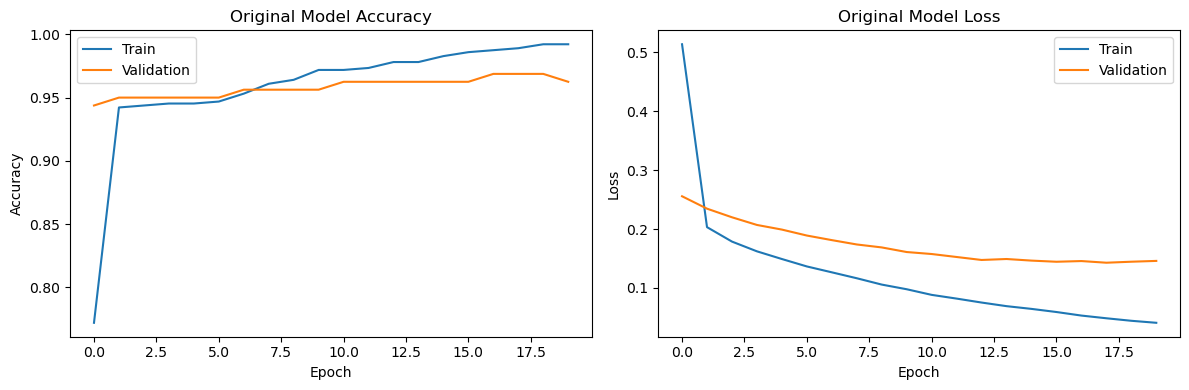

In [3]:
# Function to plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

# Plot the training history of the original model
plot_history(history_orig, 'Original Model')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


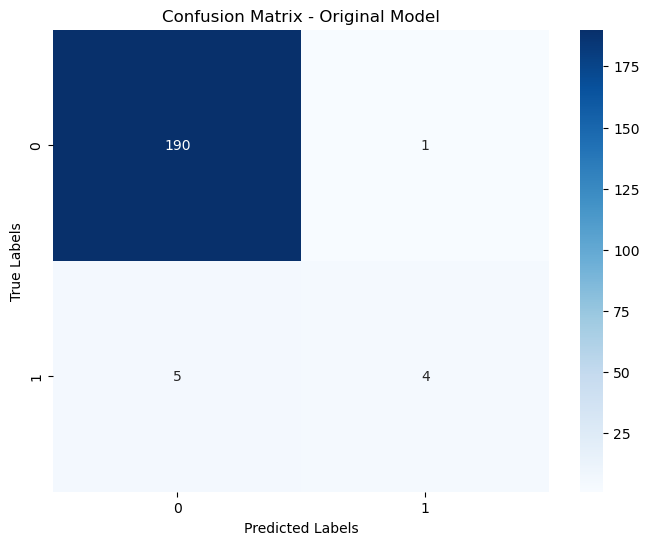

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred_orig = model_orig.predict(X_test_orig)


# Convert one-hot encoded predictions back to labels
y_pred_orig_labels = np.argmax(y_pred_orig, axis=1)
y_test_orig_labels = np.argmax(y_test_orig, axis=1)


y_test_labels = np.argmax(y_test_orig, axis=1)

# Generate confusion matrix for the original model
cm_orig = confusion_matrix(y_test_orig_labels, y_pred_orig_labels)

# Generate confusion matrix for the balanced model


# Plot confusion matrix for the original model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Original Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Balanceamos las clases con SMOTE

In [7]:
# Check class distribution
print("Original class distribution:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check new class distribution
print("Balanced class distribution:", Counter(y_balanced))

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)


Original class distribution: Counter({np.int64(0): 947, np.int64(1): 53})
Balanced class distribution: Counter({np.int64(0): 947, np.int64(1): 947})


In [8]:

# Define the model
model = keras.Sequential([
    layers.Input(shape=(20,)),  # Input layer (20 features)
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 units
    layers.Dense(2, activation='softmax')  # Output layer (2 classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,490 (13.63 KB)

 Trainable params: 3,490 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6809 - loss: 0.6397 - val_accuracy: 0.9010 - val_loss: 0.2742
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9323 - loss: 0.2215 - val_accuracy: 0.9340 - val_loss: 0.1864
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9734 - loss: 0.1323 - val_accuracy: 0.9571 - val_loss: 0.1388
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9840 - loss: 0.0992 - val_accuracy: 0.9604 - val_loss: 0.1162
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9870 - loss: 0.0789 - val_accuracy: 0.9670 - val_loss: 0.1045
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9878 - loss: 0.0665 - val_accuracy: 0.9670 - val_loss: 0.0849
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9900 - loss: 0.0497 - val_accuracy: 0.9703 - val_loss: 0.0759
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9948 - loss: 0.0467 - val_accuracy: 0.9637 - val_loss:

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


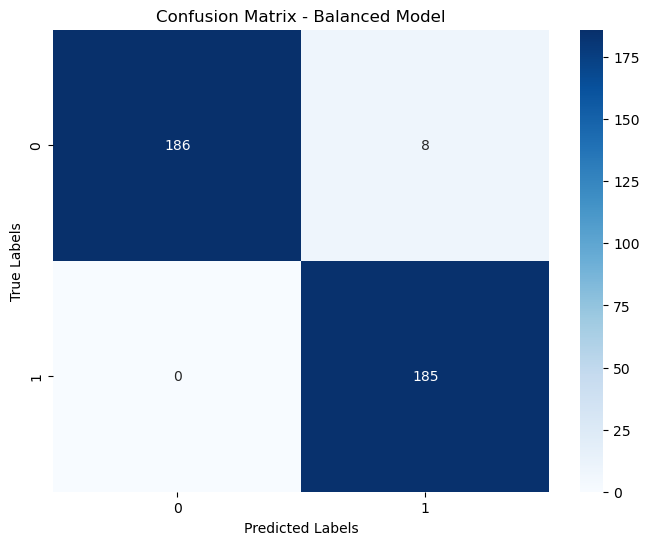

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions back to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Generate confusion matrix for the balanced model
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix for the balanced model
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Balanced Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()